In [48]:
import librosa
import IPython.display as ipd
import skimage
import numpy
from skimage import io
import matplotlib.pyplot as plt
import librosa.display
import sklearn

!pwd
#load audio file into librosa
audio_data = 'blues_0_Whole_Lotta’_Love.mp3'

x , sr = librosa.load(audio_data)



# ******Split song up into small segments****

#settings
# hop length = number of samples per time-step in spectrogram
#hop_length = 512 

# number of time-steps. (Width of spectogram/png)
#time_steps = 384

# start sample at the beginning
#start_sample = 0 

#length_samples = time_steps*hop_length
#window = x[start_sample:start_sample+length_samples]
audio_data

/content


'blues_0_Whole_Lotta’_Love.mp3'

In [49]:
#define scale of png image
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled




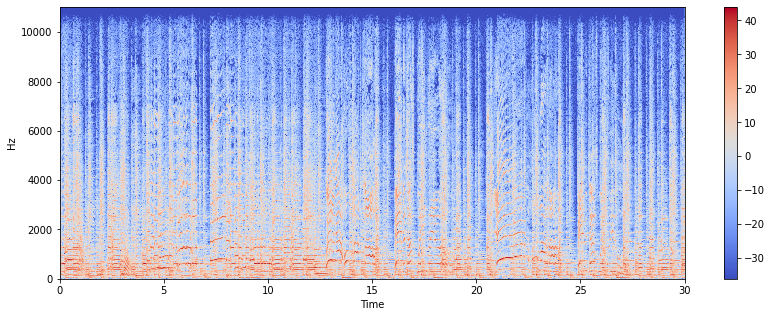

In [50]:
#Plot Spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

 # scale png image to 8 bit
img = scale_minmax(Xdb, 0, 255).astype(numpy.uint8)

# put x axis at "0"
img = numpy.flip(img, axis=0) 

 # invert image to black== machine learning is colorblind apparently
img = 255-img

# save as PNG
skimage.io.imsave("out.png", img)

In [51]:
#find spectral centroid value
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)
spectral_centroids.shape

(1, 1292)

In [52]:
#find spectral rolloff value
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)
spectral_rolloff.shape

(1, 1292)

In [53]:
#find spectral bandwith value (might not use these values in analysis)
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)
spectral_bandwidth_3.shape

(1, 1292)

In [54]:
#find zero crossing rate value
zero_crossings = librosa.zero_crossings(x[2000:2100], pad=False)
print(sum(zero_crossings))

7


In [55]:
#find Chroma feature value
chromagram = librosa.feature.chroma_stft(x, sr=sr)
chromagram.shape

(12, 1292)

In [56]:
#find Mel-Frequency Cepstral Coefficients(MFCCs)
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 1292)


In [ ]:
#Next Step:
#We need to put all these values into a dataframe and write to csv
#Then load csv and perform train test split
#Then build model
#Then fit model